# 盘中动态:20241125

In [1]:
import nbimporter
from 盘前作业20241125 import plotStock
import akshare as ak

repday='20241125'

## 1. 今日板块热点


![今日涨幅国泰君安APP](gtja.png)

#### 2.2.1 集合竞价概念板块排名

In [2]:
import datetime
import os
import pandas as pd

#记录排名
# basename: 板块类型（概念板块、行业板块）
# start_time, end_time: 排名时间段
# sector: 板块名称
def recordRank(basename,start_time,end_time):
    now = datetime.datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'{basename}{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        if basename=='conceptRank':
            rank=ak.stock_board_concept_name_em()
        elif basename=='industryRank':
            rank=ak.stock_board_industry_name_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('非指定时间段，没有数据源.')
            rank=pd.DataFrame()
    if not rank.empty:
        mvtotal=rank['总市值'].sum()
        rank['市值比']=rank['总市值']/mvtotal
        rank['上涨家数%']=rank['上涨家数']/(rank['上涨家数']+rank['下跌家数'])
        columns=['排名','板块名称','板块代码','涨跌幅','市值比','换手率','上涨家数%','领涨股票','领涨股票-涨跌幅']
        rank=rank[columns]
    return rank

#排名靠前的板块的股票明细排名
# sectorRankDf: 板块排名DataFrame(recordRank生成)
# sectorNum,stockNum: 返回板块数、股票数
def top5sectorStocks(basename,start_time,end_time,sectorRankDf,sectorNum=5,stockNum=5):
    top5={}
    now = datetime.datetime.now()
    tStr = start_time.strftime("%Y%m%d%H%M")
    if sectorRankDf.empty:
        print('非指定时间段，没有数据源。')
    else:
        print('排名前5领涨板块成分股列表。')
        for sym in sectorRankDf['板块名称'].to_list()[:5]:
            csvfile=f'{basename}_{sym}{tStr}.txt'
            if now.time() < end_time and now.time() >= start_time:
                if basename=='conceptRank':
                    top5[sym]=ak.stock_board_concept_cons_em(sym)
                else:
                    top5[sym]=ak.stock_board_industry_cons_em(sym)
                top5[sym].to_csv(csvfile)
            else:
                if os.path.exists(csvfile):
                    top5[sym]=pd.read_csv(csvfile)
                else:
                    print('No record stored and not available from source.')
                    top5[sym]=pd.DataFrame()

            if not top5[sym].empty:
                atotal=top5[sym]['成交额'].sum()
                top5[sym]['成交额比']=top5[sym]['成交额']/atotal
                columns=['代码','名称','涨跌幅','成交额','换手率','市盈率-动态','市净率']
                top5[sym]=top5[sym][columns][:stockNum]
                print(f'板块：{sym}:\n{top5[sym]}\n\n')
    return top5   

In [3]:
#当天集合竞价阶段概念板块排名
basename='conceptRank'
start_time = datetime.time(9, 15)
end_time = datetime.time(9, 31)
rank0=recordRank(basename,start_time,end_time)
rank0.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,AI制药,BK1170,6.09,0.000085,0.12,0.923077,贝瑞基因,10.01
1,2,昨日连板_含一字,BK1051,4.21,0.000184,1.50,0.717949,粤桂股份,10.01
2,3,昨日涨停_含一字,BK1050,3.82,0.000307,0.37,0.756757,滨海能源,10.02
3,4,DRG/DIP,BK1054,3.42,0.000096,0.07,0.882353,嘉和美康,19.13
4,5,昨日涨停,BK0815,2.60,0.000233,0.27,0.700000,滨海能源,10.02
5,6,SPD概念,BK1147,2.55,0.000048,0.10,0.818182,润达医疗,10.02
6,7,高带宽内存,BK1152,2.30,0.000091,0.05,0.833333,国芯科技,8.21
7,8,血氧仪,BK1122,2.29,0.000087,0.05,0.692308,理邦仪器,20.00
8,9,盲盒经济,BK0954,2.16,0.000071,0.25,0.800000,高乐股份,10.05
9,10,昨日连板,BK0816,1.92,0.000080,0.89,0.631579,广博股份,9.96


In [4]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank0)

排名前5领涨板块成分股列表。
板块：AI制药:
       代码    名称    涨跌幅         成交额   换手率  市盈率-动态   市净率
0  300206  理邦仪器  20.00  49450685.1  1.04   35.48  4.03
1  688246  嘉和美康  19.13   5209803.0  0.15  -88.78  2.73
2  603108  润达医疗  10.02  75922203.0  0.59  189.82  2.97
3  000710  贝瑞基因  10.01  15359112.0  0.48  258.11  1.91
4  301230  泓博医药   8.52   6647400.0  0.32  185.43  3.61


板块：昨日连板_含一字:
       代码     名称    涨跌幅           成交额   换手率  市盈率-动态   市净率
0  300822   贝仕达克  15.91  5.887200e+07  0.93   86.17  5.36
1  002467    二六三  10.05  3.420314e+07  0.38  106.83  4.88
2  002611   东方精工  10.03  1.235944e+09  7.97   43.16  3.93
3  002095  生 意 宝  10.02  9.051569e+07  1.52 -301.07  6.57
4  600889   南京化纤  10.02  1.437078e+06  0.03  -21.44  6.36


板块：昨日涨停_含一字:
       代码    名称    涨跌幅           成交额   换手率   市盈率-动态    市净率
0  300822  贝仕达克  15.91  5.887200e+07  0.93    86.17   5.36
1  002467   二六三  10.05  3.420314e+07  0.38   106.83   4.88
2  600775  南京熊猫  10.04  1.167286e+08  1.43   -84.31   3.47
3  002611  东方精工  10.03  1.235944

OSError: Cannot save file into a non-existent directory: 'conceptRank_DRG'

#### 2.2.3 开盘后15分钟概念板块排名

In [5]:
start_time = datetime.time(9, 31)
end_time = datetime.time(9, 52)
rank1=recordRank(basename,start_time,end_time)
rank1.head(20)

非指定时间段，没有数据源.


""


排名前5概念板块领涨成分股

In [6]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank1)

非指定时间段，没有数据源。


#### 2.2.3 集合竞价行业板块涨跌幅

In [7]:
#当天集合竞价到开盘后30分钟涨跌幅排名
basename='industryRank'
start_time = datetime.time(9, 15)
end_time = datetime.time(9, 31)
rank3=recordRank(basename,start_time,end_time)
rank3.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,医疗器械,BK1041,1.35,0.013733,0.04,0.754545,贝瑞基因,10.01
1,2,医疗服务,BK0727,1.32,0.006924,0.04,0.810811,润达医疗,10.02
2,3,贵金属,BK0732,0.96,0.007843,0.03,0.692308,湖南黄金,10.00
3,4,互联网服务,BK0447,0.95,0.017240,0.14,0.755556,生 意 宝,10.02
4,5,游戏,BK1046,0.95,0.003384,0.11,0.727273,汤姆猫,4.98
5,6,汽车整车,BK1029,0.85,0.021915,0.02,0.791667,上汽集团,5.12
6,7,软件开发,BK0737,0.83,0.023780,0.13,0.686486,数字人,29.99
7,8,家用轻工,BK0440,0.79,0.002721,0.09,0.700000,广博股份,9.96
8,9,电子化学品,BK1039,0.76,0.002856,0.04,0.760000,光华科技,10.01
9,10,造纸印刷,BK0470,0.64,0.002607,0.04,0.500000,滨海能源,10.02


行业板块中成分股

In [8]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank3)

排名前5领涨板块成分股列表。
板块：医疗器械:
       代码    名称    涨跌幅         成交额   换手率  市盈率-动态   市净率
0  832278  鹿得医疗  29.91  11343202.2  1.16   92.55  5.81
1  301060  兰卫医学  20.04  31227068.0  0.73  -88.67  2.77
2  300206  理邦仪器  20.00  49450685.1  1.04   35.48  4.03
3  688358  祥生医疗  12.22   7798410.0  0.26   23.07  2.20
4  000710  贝瑞基因  10.01  15359112.0  0.48  258.11  1.91


板块：医疗服务:
       代码    名称    涨跌幅         成交额   换手率  市盈率-动态   市净率
0  688246  嘉和美康  19.13   5209803.0  0.15  -88.78  2.73
1  603108  润达医疗  10.02  75922203.0  0.59  189.82  2.97
2  300244  迪安诊断   5.73   6887980.0  0.10   46.92  1.16
3  688222  成都先导   4.47   1185075.0  0.02  125.81  3.67
4  300404  博济医药   2.65    619048.0  0.03   59.10  3.47


板块：贵金属:
       代码    名称    涨跌幅          成交额   换手率  市盈率-动态   市净率
0  002155  湖南黄金  10.00  30752939.36  0.13   27.36  3.62
1  002716  湖南白银   2.70  18238860.00  0.22   65.18  3.31
2  601069  西部黄金   0.93   5706304.00  0.06   69.77  2.65
3  600988  赤峰黄金   0.79   8746920.00  0.03   20.10  4.16
4  601899  紫金矿业

#### 2.2.4 开盘15分钟行业板块涨跌幅

In [9]:
basename='industryRank'
start_time = datetime.time(9, 31)
end_time = datetime.time(9, 51)
rank4=recordRank(basename,start_time,end_time)
rank4.head(20)

非指定时间段，没有数据源.


""


行业板块中成分股

### 2.2.5 集合竞价阶段涨停个股热点明细

In [10]:
#在指定时段获取涨停数据，若时间不在指定时段，则读取历史最后一次下载的记录。
def stockLimitUp(start_time,end_time):
    now = datetime.datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'limitUp{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        rank=ak.stock_zh_a_spot_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('No record stored and not available from source.')
            rank=pd.DataFrame()
    if not rank.empty:
        columns=['代码','名称','涨跌幅','量比','换手率','市盈率-动态','市净率','流通市值','涨速','5分钟涨跌','60日涨跌幅','年初至今涨跌幅']
        rank=rank[columns].sort_values(by='涨跌幅', ascending=False)
    return rank

In [11]:
start_time = datetime.time(9, 15)
end_time = datetime.time(9, 31)
openA = stockLimitUp(start_time,end_time)
openA.head(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,835670,数字人,29.99,37.70,1.97,-264.64,10.92,1.624383e+09,0.0,18.42,170.01,60.91
1,832278,鹿得医疗,29.91,20.46,1.16,92.55,5.81,9.745692e+08,0.0,19.44,175.05,50.70
2,301060,兰卫医学,20.04,69.60,0.73,-88.67,2.77,4.271832e+09,0.0,0.00,38.98,-9.86
3,300206,理邦仪器,20.00,46.06,1.04,35.48,4.03,4.759324e+09,0.0,0.00,76.07,39.80
4,688246,嘉和美康,19.13,9.20,0.15,-88.78,2.73,3.583274e+09,0.0,11.42,110.68,6.22
5,300822,贝仕达克,15.91,47.20,0.93,86.17,5.36,6.357605e+09,0.0,-3.42,125.64,90.97
6,688358,祥生医疗,12.22,52.44,0.26,23.07,2.20,3.027362e+09,0.0,-6.25,18.73,-26.99
7,600185,格力地产,10.06,37.54,0.38,-13.26,3.52,1.628645e+10,0.0,0.00,85.81,19.50
8,002348,高乐股份,10.05,33.21,0.82,-84.02,8.01,3.600356e+09,0.0,0.00,84.93,5.19
9,002467,二六三,10.05,6.30,0.38,106.83,4.88,9.107356e+09,0.0,0.00,107.45,43.97


### 2.2.6 开盘15分钟涨停个股热点明细


In [12]:
start_time = datetime.time(9, 31)
end_time = datetime.time(9, 53)
open15 = stockLimitUp(start_time,end_time)
open15.head(50)

No record stored and not available from source.


""


#### 2.2.7 板块动态评析

本轮行情启动股票热点追踪（需要从历史行情中组合分析，现有股票涨停池昨日和今日都不稳定）

## 4.个股市场


### 4.1 跟进股票列表
#### 4.1.1 历史K线

In [21]:
def plotDcStockSingle(df,days,title):
    OCHLVDict={'日期':'Date','开盘':'Open','收盘':'Close','最高':'High','最低':'Low','成交量':'Volume'}
    print(f'{days}K线图')
    plotStock(df.tail(days),OCHLVDict,title)

In [24]:
#根据代码获取股票信息
#symbol:若是字符串，则返回单个股信息；若是列表，则遍历元素，返回相应列表。
def getStockInfo(symbol):
    if type(symbol).__name__=='str':
        stocknamedf=ak.stock_individual_info_em(symbol=symbol)
        stockname=stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1]
        stockIPO=stocknamedf.loc[stocknamedf['item']=='上市时间','value'][7]
        stockIndustry=stocknamedf.loc[stocknamedf['item']=='行业','value'][6]
        stockTAmount=stocknamedf.loc[stocknamedf['item']=='总股本','value'][2]
        stockFAmount=stocknamedf.loc[stocknamedf['item']=='流通股','value'][3]
        stockTValue=stocknamedf.loc[stocknamedf['item']=='总市值','value'][4]
        stockFValue=stocknamedf.loc[stocknamedf['item']=='流通市值','value'][5]
    else:
        stockname,stockIPO,stockIndustry,stockTAmount,stockFAmount,stockTValue,stockFValue=[],[],[],[],[],[],[]
        for sym in symbol:
            stocknamedf=ak.stock_individual_info_em(symbol=sym)
            stockname.append(stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1])
            stockIPO.append(stocknamedf.loc[stocknamedf['item']=='上市时间','value'][7])
            stockIndustry.append(stocknamedf.loc[stocknamedf['item']=='行业','value'][6])
            stockTAmount.append(stocknamedf.loc[stocknamedf['item']=='总股本','value'][2])
            stockFAmount.append(stocknamedf.loc[stocknamedf['item']=='流通股','value'][3])
            stockTValue.append(stocknamedf.loc[stocknamedf['item']=='总市值','value'][4])
            stockFValue.append(stocknamedf.loc[stocknamedf['item']=='流通市值','value'][5])
            
    return {'名称':stockname,'IPO':stockIPO,'行业':stockIndustry,'总股本':stockTAmount,'流通股':stockFAmount,'总市值':stockTValue,'流通市值':stockFValue}

#画指定周期的股票烛线图
def plotDcStocks(stocksymb,periods):
    stockDict={}
    for p in periods:
        stockdf = ak.stock_zh_a_hist(symbol=stocksymb,period=p)
        stockname=getStockInfo(stocksymb)['名称']
        stockDict[p]=stockdf
        title=f'{stockname}-周期：{p}\n'
        plotDcStockSingle(stockdf,100,title)
    stockDict['name']=stockname
    return stockDict

100K线图


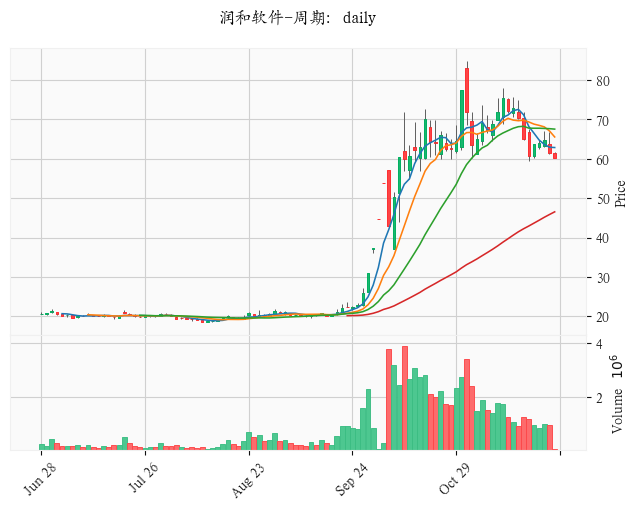

100K线图


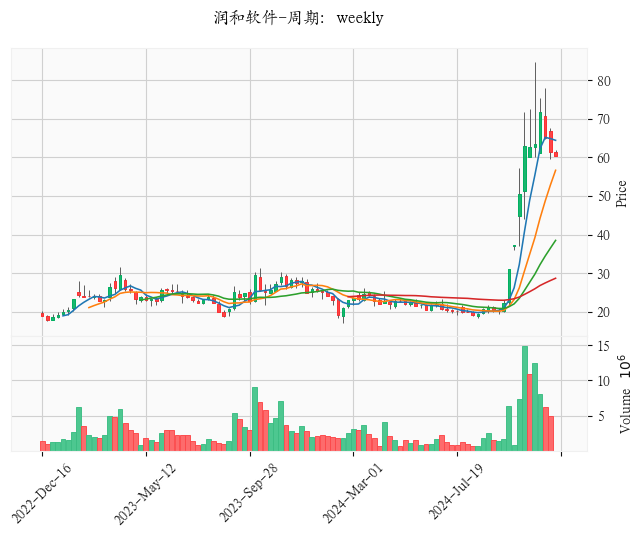

100K线图


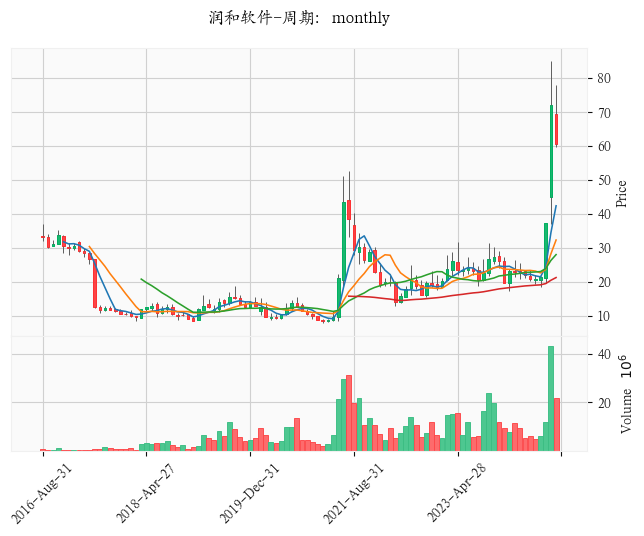

In [25]:
stocksymb='300339'
periods=['daily','weekly','monthly']
stockDict=plotDcStocks(stocksymb,periods)

### 4.1.2 盘口信息汇总
#### 4.1.2.1 成交和挂单明细

获取腾讯当日历史分笔数据

In [26]:
# 根据code代码返回“交易所+代码” 信息，或者反过来
def transferExSym(code):
    if len(code)>6:
        rescode=code[-6:]
    else:
        source={}
        source['sh']=ak.stock_sh_a_spot_em()['代码'].to_list()
        source['sz']=ak.stock_sz_a_spot_em()['代码'].to_list()
        source['bj']=ak.stock_bj_a_spot_em()['代码'].to_list()
        for k in source.keys():
            if code in source[k]:
                rescode=k+code
                break
    return rescode

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#区分北交所和沪深股市，刻画市场深度。按照涨跌停板，作为极值，按照价格涨幅的measure度量区间
def priceMarketDepth(df,measure=0.01):

    open_price = df.loc[df['成交时间'] == '09:30:00', '成交价格'].iloc[0]

    # 设置涨跌停板系数
    if stocksymb == 'bj':
        limit_factor = 0.2
    else:
        limit_factor = 0.1

    # 计算最高价和最低价
    high_price = open_price * (1 + limit_factor)
    low_price = open_price * (1 - limit_factor)

    # 定义价格区间，每1%一档
    price_bins = np.round(np.arange(low_price, high_price, (high_price - low_price) * measure),2)

    # 将价格按照区间划分
    df['价格区间'] = pd.cut(df['成交价格'], bins=price_bins, right=False)

    # 按照价格区间汇总成交量
    volume_summary = df.groupby('价格区间',observed=False)['成交量'].sum().reset_index()

    # 新建 df['prop'] 列
    df['prop'] = df['性质'].apply(lambda x: -1 if x == '卖盘' else (1 if x == '买盘' else 0))
    
    # 按照价格区间汇总成交量和 prop 之和
    summary = df.groupby('价格区间',observed=False).agg({
        '成交量': 'sum',
        'prop': 'sum'
    }).reset_index()
    
    # 提取价格区间的中点和边界
    summary['价格'] = summary['价格区间'].apply(lambda x: round(x.mid,2))
    summary['起始价格'] = summary['价格区间'].apply(lambda x: round(x.left,2))
    summary['终止价格'] = summary['价格区间'].apply(lambda x: round(x.right,2))

    # 分离买盘和卖盘数据
    summary['买盘深度'] = summary['prop'].apply(lambda x: x if x > 0 else 0)
    summary['卖盘深度'] = -summary['prop'].apply(lambda x: -x if x < 0 else 0)

    # 绘制市场深度水平条形图
    fig, ax = plt.subplots(figsize=(14, 21))

    # 绘制买卖盘深度图
    ax.barh(summary['价格'], summary['买盘深度'], color='green', label='buy')
    ax.barh(summary['价格'], summary['卖盘深度'], color='red', label='sell')
    
    # 在图上标注区间价格的起始和终止价格
    for index, row in summary.iterrows():
        ax.text(row['买盘深度'] + max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["起始价格"]:.2f}', va='center', ha='left', fontsize=8, color='black')
        ax.text(-row['卖盘深度'] - max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["终止价格"]:.2f}', va='center', ha='right', fontsize=8, color='black')

    # 设置图表标题和标签
    ax.set_title('Market Depth')
    ax.set_xlabel('Depth(Amount)')
    ax.set_ylabel('Price')
    ax.legend()

    
    # 显示图表
    plt.show()
    
    return summary

In [28]:
from rich.console import Console
from rich.table import Table

#美观显示DataFrame表格
class DataFramePretty(object):
    def __init__(self, df: pd.DataFrame, min_max_cols=[]) -> None:
        self.data = df
        self.min_max_cols = min_max_cols

    def __set_min_max_style(self, df: pd.DataFrame):
        imax = self.data.idxmax()
        imin = self.data.idxmin()

        max_tmpl = "[b on red3]{}[/b on red3]"
        min_tmpl = "[i on green3]{}[/i on green3]"

        for col in self.min_max_cols:
            col_idx = imax.index.tolist().index(col)
            val = df.iloc[imax[col], col_idx]
            df.iloc[imax[col], col_idx] = max_tmpl.format(val)

            col_idx = imin.index.tolist().index(col)
            val = df.iloc[imin[col], col_idx]
            df.iloc[imin[col], col_idx] = min_tmpl.format(val)

    def show(self):
        table = Table(
            title="DataFrame",
            title_style="i on dark_cyan",
            header_style="bold cyan",
        )

        # self.data是原始数据
        # df 是用来显示的数据
        df = self.data.copy()
        for col in df.columns:
            df[col] = df[col].astype("str")
            table.add_column(col)

        self.__set_min_max_style(df)

        for idx in range(len(df)):
            table.add_row(*df.iloc[idx].tolist())

        console = Console()
        console.print(table)

In [29]:
#剔除中性单以后，列出活跃买卖市场深度
def plotActiveMarketDepth(stocksymbol):
    
    print(f'市场深度：{stocksymb}')
    #一次性获得历史分笔数据（当天即当天之前的交易时间；隔天即昨天）
    yesterdayTicks=ak.stock_zh_a_tick_tx_js(symbol=transferExSym(stocksymb))
    
    md=priceMarketDepth(yesterdayTicks)
    md = md[(md['买盘深度'] != 0) | (md['卖盘深度'] != 0)]
    mdp=DataFramePretty(md)
    mdp.show()
    return  md

剔除中性盘以后，主动买卖盘的市场深度

市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


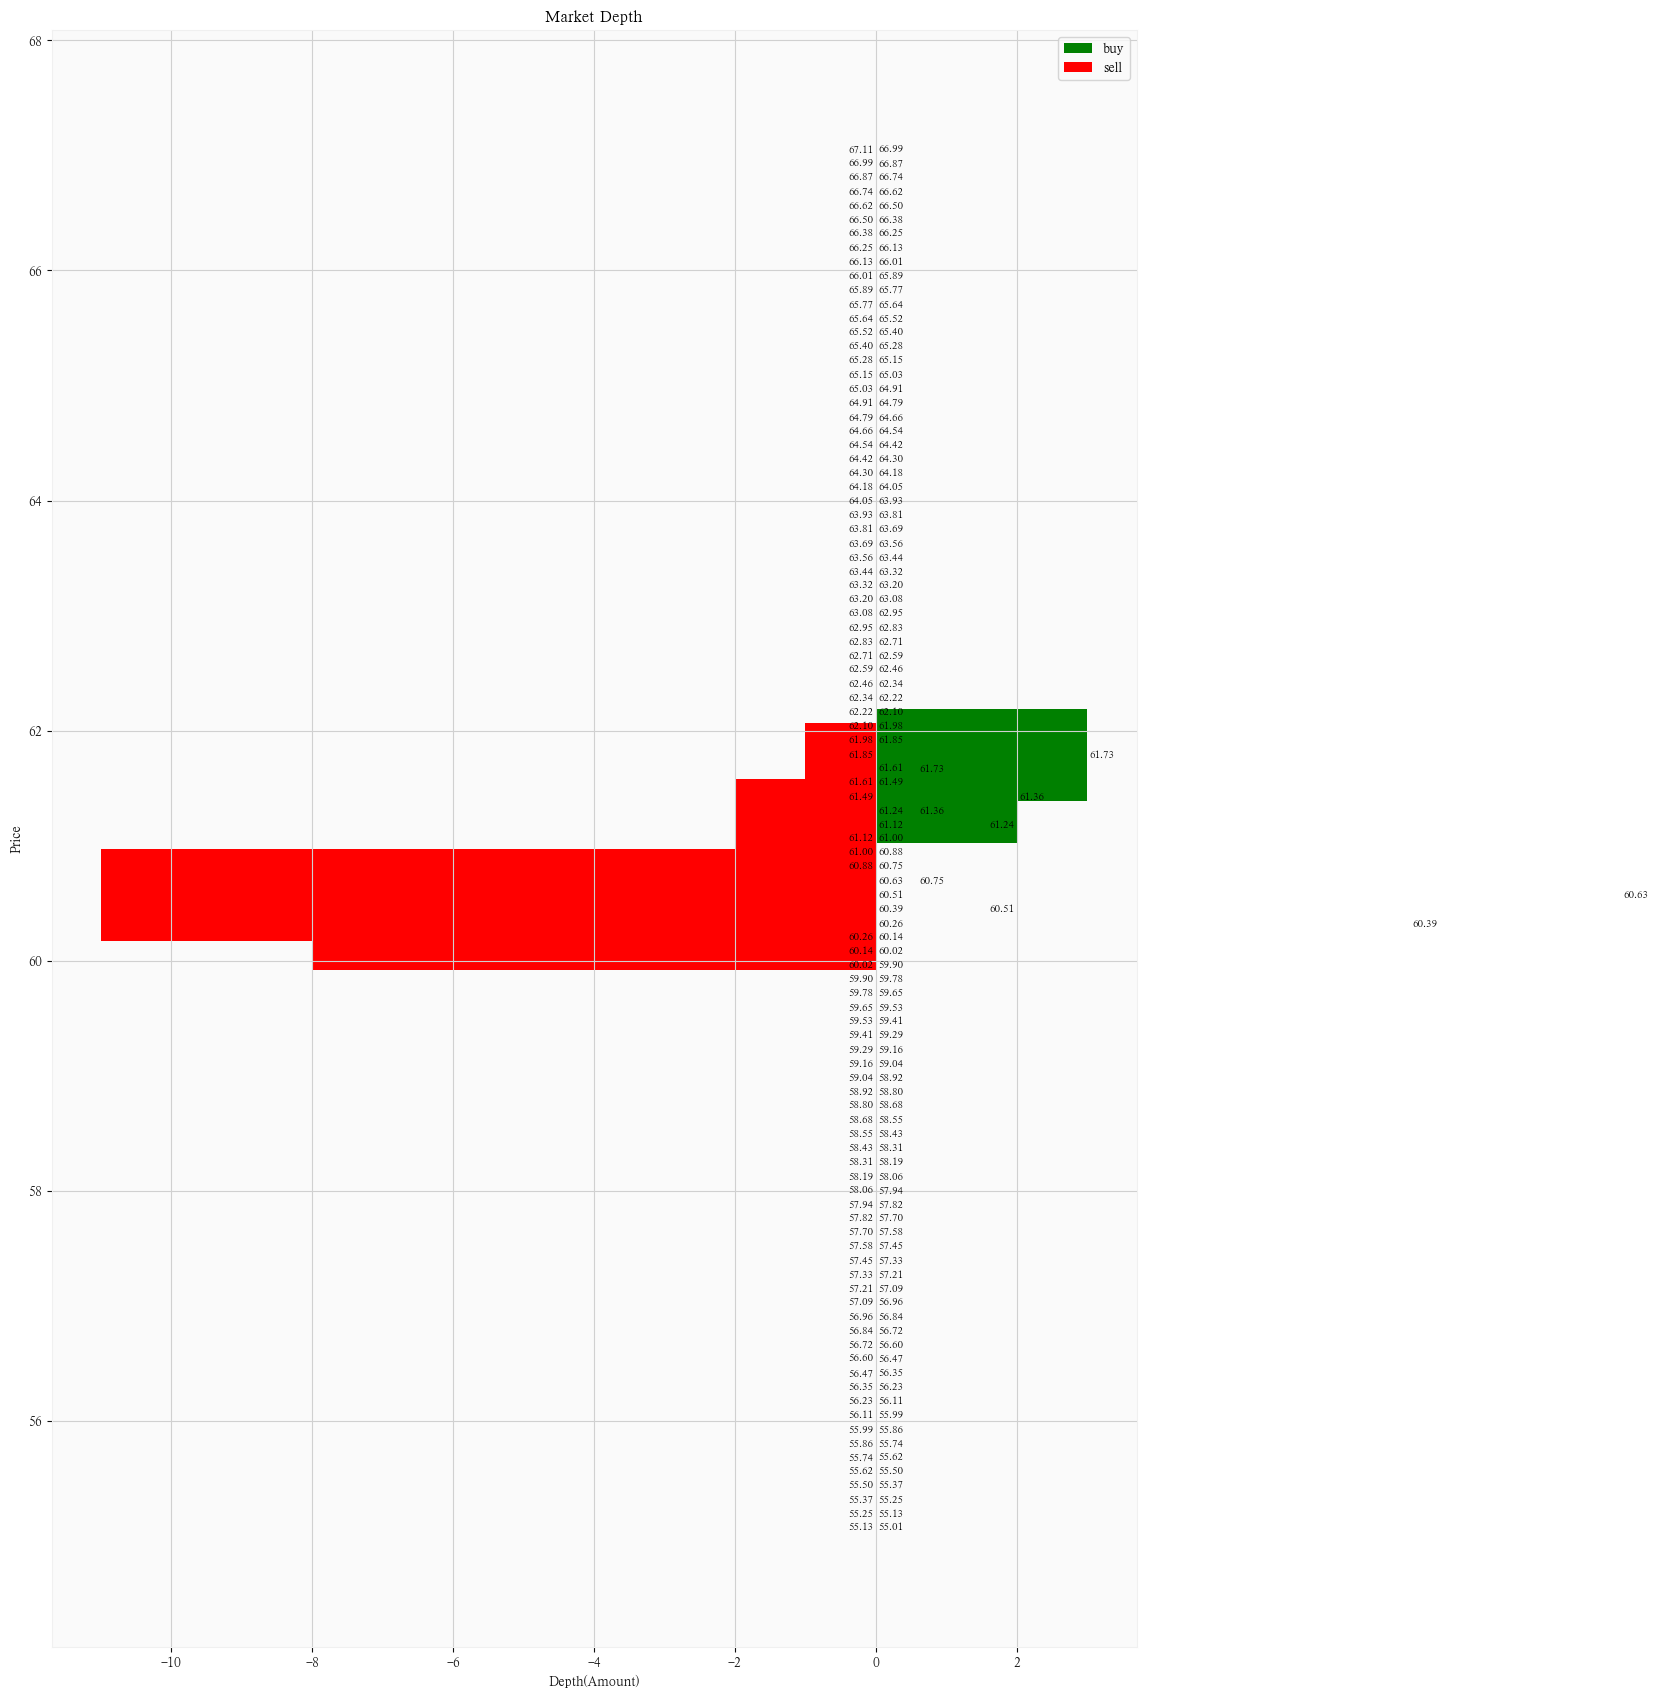

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [60.26, 60.39) │ 9152   │ -8   │ 60.32 │ 60.26    │ 60.39    │ 0        │ -8       │
│ [60.39, 60.51) │ 6557   │ -2   │ 60.45 │ 60.39    │ 60.51    │ 0        │ -2       │
│ [60.51, 60.63) │ 13828  │ -11  │ 60.57 │ 60.51    │ 60.63    │ 0        │ -11      │
│ [60.63, 60.75) │ 11787  │ -1   │ 60.69 │ 60.63    │ 60.75    │ 0        │ -1       │
│ [61.12, 61.24) │ 4174   │ -2   │ 61.18 │ 61.12    │ 61.24    │ 0        │ -2       │
│ [61.24, 61.36) │ 1730   │ -1   │ 61.3  │ 61.24    │ 61.36    │ 0        │ -1       │
│ [61.36, 61.49) │ 7538   │ 2    │ 61.42 │ 61.36    │ 61.49    │ 2        │ 0        │
│ [61.61, 61.73) │ 1792   │ -1   │ 61.67 │ 61.61    │ 61.73    │ 0        │ -1       │
│ [61.73, 61.85) │ 2512   │ 3    │ 61.79 │ 61.73    │ 61.85    │ 3        │ 0        │
└────────────────┴────────┴──────┴───────┴──────────┴──────────┴──────────┴──────────┘

,价格区间,成交量,prop,价格,起始价格,终止价格,买盘深度,卖盘深度
43,"[60.26, 60.39)",9152,-8,60.32,60.26,60.39,0,-8
44,"[60.39, 60.51)",6557,-2,60.45,60.39,60.51,0,-2
45,"[60.51, 60.63)",13828,-11,60.57,60.51,60.63,0,-11
46,"[60.63, 60.75)",11787,-1,60.69,60.63,60.75,0,-1
50,"[61.12, 61.24)",4174,-2,61.18,61.12,61.24,0,-2
51,"[61.24, 61.36)",1730,-1,61.30,61.24,61.36,0,-1
52,"[61.36, 61.49)",7538,2,61.42,61.36,61.49,2,0
54,"[61.61, 61.73)",1792,-1,61.67,61.61,61.73,0,-1
55,"[61.73, 61.85)",2512,3,61.79,61.73,61.85,3,0


In [30]:
plotActiveMarketDepth(stocksymb)

### 4.1.3 个股追踪
追踪股票列表

In [31]:
focusStocks=['300576','600839','600157','000717','002607','600127','600605','600217','300727','301421','002843','600968','300159','601688']
getInfo=getStockInfo(focusStocks)
Analist=pd.DataFrame({'代码':focusStocks,'名称':getInfo['名称'],'IPO':getInfo['IPO'],'行业':getInfo['行业'],'流通股':getInfo['流通股'],'总股本':getInfo['总股本']})
Analist['流通股']=Analist['流通股'].astype(int)
Analist['总股本']=Analist['总股本'].astype(int)
Analist['流通率']=Analist['流通股']/Analist['总股本']
Analist

,代码,名称,IPO,行业,流通股,总股本,流通率
0,300576,容大感光,20161220,电子化学品,183530814,295708699,0.620647
1,600839,四川长虹,19940311,家电行业,4614958631,4616244222,0.999722
2,600157,永泰能源,19980513,电力行业,22217764145,22217764145,1.000000
3,000717,中南股份,19970508,钢铁行业,2423523840,2423845590,0.999867
4,002607,中公教育,20110810,教育,5028744315,6167399389,0.815375
5,600127,金健米业,19980506,农牧饲渔,641783218,641783218,1.000000
6,600605,汇通能源,19920327,房地产服务,206282429,206282429,1.000000
7,600217,中再资环,19991216,环保行业,1388659782,1657653673,0.837726
8,300727,润禾材料,20171127,化学制品,113888282,127725100,0.891667
9,301421,波长光电,20230823,光学光电子,46308485,115718000,0.400184


In [33]:
import akshare as ak
import dolphindb as ddb
import pandas as pd
import time
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor

# 初始化 DolphinDB 连接
s = ddb.session()
s.connect("localhost", 8848, "admin", "123456")  # 替换为实际的主机、端口、用户名和密码

# 创建 DolphinDB 表
s.run("""
if (existsDatabase("dfs://Quote")) {
    dropDatabase("dfs://Quote")
}
t = table(1:0, `timestamp`sym`sell_5`sell_5_vol`sell_4`sell_4_vol`sell_3`sell_3_vol`sell_2`sell_2_vol`sell_1`sell_1_vol`buy_1`buy_1_vol`buy_2`buy_2_vol`buy_3`buy_3_vol`buy_4`buy_4_vol`buy_5`buy_5_vol`最新`均价`涨幅`涨跌`总手`金额`换手`量比`最高`最低`今开`昨收`涨停`跌停`外盘`内盘, [TIMESTAMP, SYMBOL, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE])
database("dfs://Quote", VALUE, t)
""")

def is_within_trading_hours(current_time):
    # 定义交易时间段
    morning_start = current_time.replace(hour=9, minute=15, second=0, microsecond=0)
    morning_end = current_time.replace(hour=11, minute=30, second=0, microsecond=0)
    afternoon_start = current_time.replace(hour=13, minute=0, second=0, microsecond=0)
    afternoon_end = current_time.replace(hour=15, minute=0, microsecond=0)
    
    return (morning_start <= current_time <= morning_end) or (afternoon_start <= current_time <= afternoon_end)

def fetch_and_store(symbol):
    # 获取当前时间
    current_time = datetime.now()

    if is_within_trading_hours(current_time):fgggttryy
        # 获取股票数据
        df = ak.stock_bid_ask_em(symbol=symbol)

        # 转换为字典
        data_dict = df.set_index('item').to_dict()['value']

        # 添加时间戳和股票代码到数据字典
        data_dict['timestamp'] = current_time
        data_dict['sym'] = symbol

        # 转换数据为 DataFrame
        transformed_df = pd.DataFrame([data_dict])

        # 将数据插入到 DolphinDB
        s.upload({"data": transformed_df})
        s.run("""
        append!(loadTable("dfs://Quote", "t"), data)
        """)]]
        ]

while True:
    
    # 使用多线程获取多个股票代码的数据
    with ThreadPoolExecutor(max_workers=len(focusStocks)) as executor:
        executor.map(fetch_and_store, focusStocks)

    # 每3秒检查一次
    time.sleep(3)


IndentationError: unexpected indent (1055247357.py, line 36)